In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [3]:
import os
os.getcwd()


'C:\\Users\\damis'

In [6]:
df = pd.read_csv(r"C:\Users\damis\OneDrive\Desktop\NBA_analysis\games.csv")
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [7]:
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [8]:
df['HOME_TEAM_WINS'].value_counts(normalize=True)


HOME_TEAM_WINS
1    0.587032
0    0.412968
Name: proportion, dtype: float64

In [11]:
print(df.dtypes)


GAME_DATE_EST        object
GAME_ID               int64
GAME_STATUS_TEXT     object
HOME_TEAM_ID          int64
VISITOR_TEAM_ID       int64
SEASON                int64
TEAM_ID_home          int64
PTS_home            float64
FG_PCT_home         float64
FT_PCT_home         float64
FG3_PCT_home        float64
AST_home            float64
REB_home            float64
TEAM_ID_away          int64
PTS_away            float64
FG_PCT_away         float64
FT_PCT_away         float64
FG3_PCT_away        float64
AST_away            float64
REB_away            float64
HOME_TEAM_WINS        int64
dtype: object


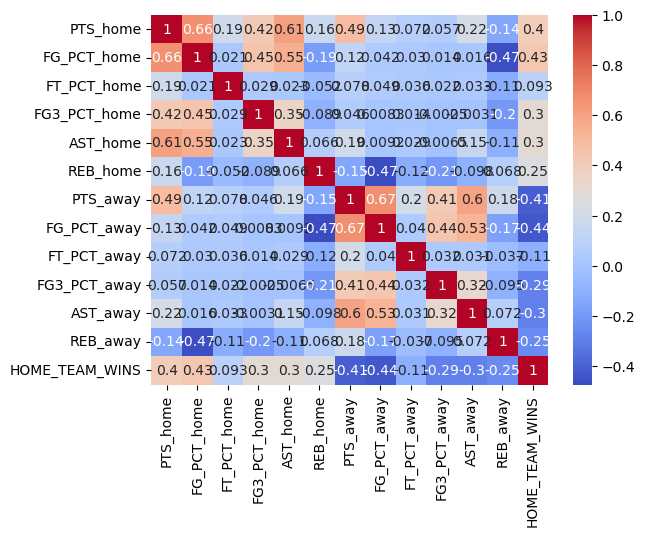

In [13]:
cols = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
        'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
        'HOME_TEAM_WINS']

sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.show()


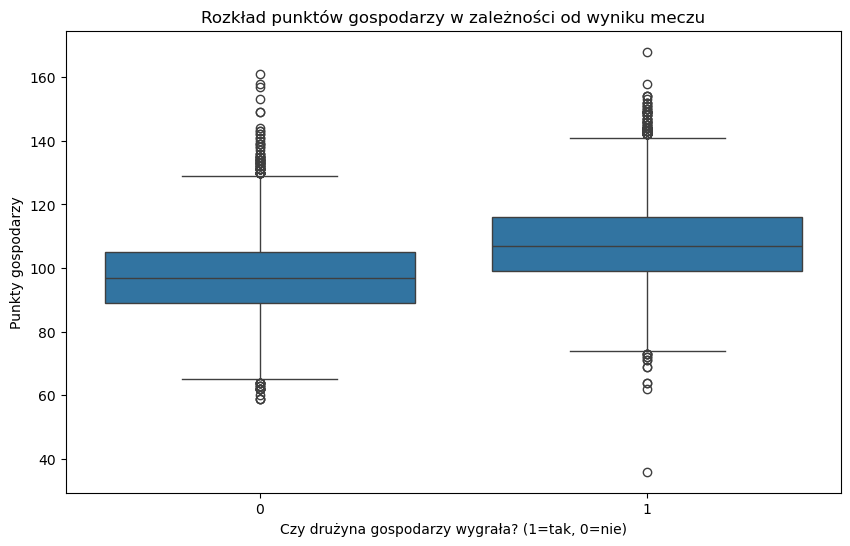

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='HOME_TEAM_WINS', y='PTS_home', data=df)
plt.title('Rozkład punktów gospodarzy w zależności od wyniku meczu')
plt.xlabel('Czy drużyna gospodarzy wygrała? (1=tak, 0=nie)')
plt.ylabel('Punkty gospodarzy')
plt.show()


In [15]:
df_clean = df.drop(columns=['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT'])


In [16]:
# Modelujemyyyyy


In [20]:
X_train.dtypes


HOME_TEAM_ID         int64
VISITOR_TEAM_ID      int64
SEASON               int64
TEAM_ID_home         int64
PTS_home           float64
FG_PCT_home        float64
FT_PCT_home        float64
FG3_PCT_home       float64
AST_home           float64
REB_home           float64
TEAM_ID_away         int64
PTS_away           float64
FG_PCT_away        float64
FT_PCT_away        float64
FG3_PCT_away       float64
AST_away           float64
REB_away           float64
dtype: object

In [21]:
X_train.isnull().sum()


HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home           67
FG_PCT_home        67
FT_PCT_home        67
FG3_PCT_home       67
AST_home           67
REB_home           67
TEAM_ID_away        0
PTS_away           67
FG_PCT_away        67
FT_PCT_away        67
FG3_PCT_away       67
AST_away           67
REB_away           67
dtype: int64

In [22]:
# Usuwamy wiersze NAN
df_clean = df.dropna()


X = df_clean.drop(columns=['HOME_TEAM_WINS']).select_dtypes(include='number')
y = df_clean['HOME_TEAM_WINS']
# dzielimy na testowe i treningowe dane, 30% testowych
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [23]:
from sklearn.linear_model import LogisticRegression
# tworzymy model B)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [24]:
y_pred = model.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.589254330906352
Confusion Matrix:
[[   0 3272]
 [   0 4694]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3272
           1       0.59      1.00      0.74      4694

    accuracy                           0.59      7966
   macro avg       0.29      0.50      0.37      7966
weighted avg       0.35      0.59      0.44      7966



C:\Users\damis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\damis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\damis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.45217172985187043
Confusion Matrix:
[[2447  825]
 [3539 1155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.75      0.53      3272
           1       0.58      0.25      0.35      4694

    accuracy                           0.45      7966
   macro avg       0.50      0.50      0.44      7966
weighted avg       0.51      0.45      0.42      7966



In [30]:
#Sprawdzam model forest ktory moze byc duzo lepszynw tym przyapdku
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9786593020336429
Confusion Matrix:
[[3174   98]
 [  72 4622]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3272
           1       0.98      0.98      0.98      4694

    accuracy                           0.98      7966
   macro avg       0.98      0.98      0.98      7966
weighted avg       0.98      0.98      0.98      7966



In [32]:
importances = rf.feature_importances_
rf_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(rf_importance)


PTS_away           0.246326
PTS_home           0.237840
FG_PCT_home        0.123699
FG_PCT_away        0.112022
FG3_PCT_home       0.044699
FG3_PCT_away       0.037182
AST_home           0.033596
REB_home           0.031643
REB_away           0.030040
AST_away           0.029500
FT_PCT_home        0.021142
FT_PCT_away        0.020602
GAME_ID            0.018331
SEASON             0.013378
HOME_TEAM_ID       0.000000
TEAM_ID_away       0.000000
TEAM_ID_home       0.000000
VISITOR_TEAM_ID    0.000000
dtype: float64


In [34]:

import pandas as pd
import matplotlib.pyplot as plt

# zakładamy, że Twój model to `rf`
importances = rf.feature_importances_

# zamieniamy na Series i sortujemy
feature_importance = pd.Series(importances, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=True)  # rosnąco dla wykresu poziomego


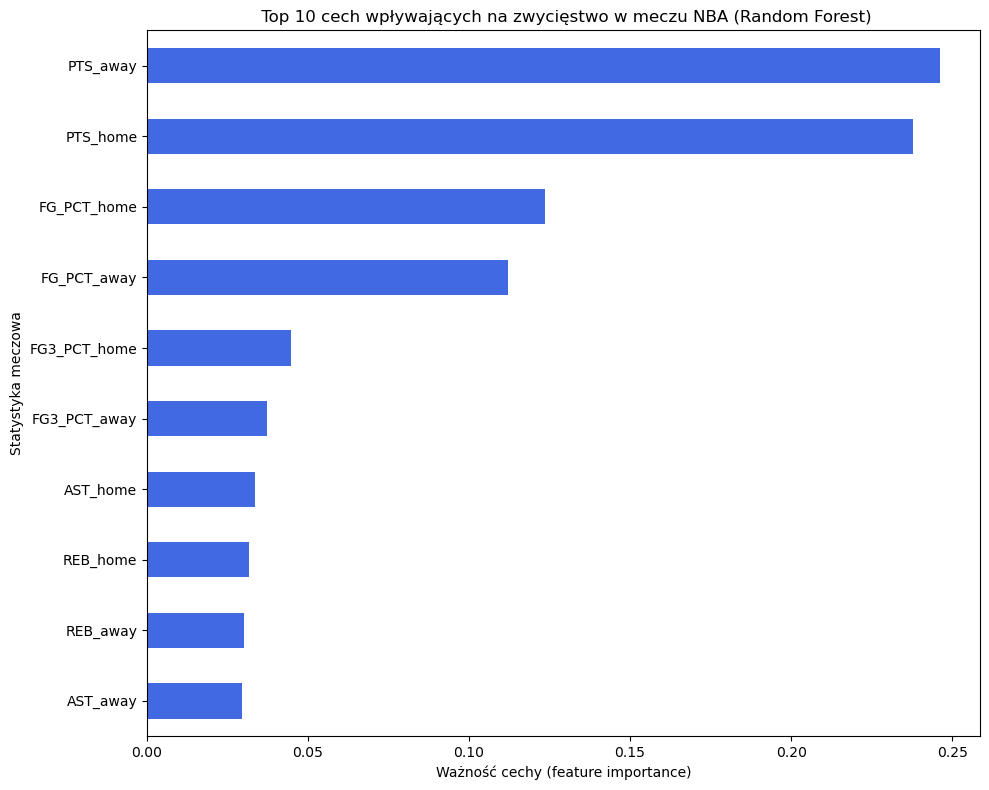

In [36]:
plt.figure(figsize=(10, 8))
feature_importance.tail(10).plot(kind='barh', color='royalblue')  # tail = ostatnie 10 największych
plt.title(" Top 10 cech wpływających na zwycięstwo w meczu NBA (Random Forest)")
plt.xlabel("Ważność cechy (feature importance)")
plt.ylabel("Statystyka meczowa")
plt.tight_layout()
plt.show()


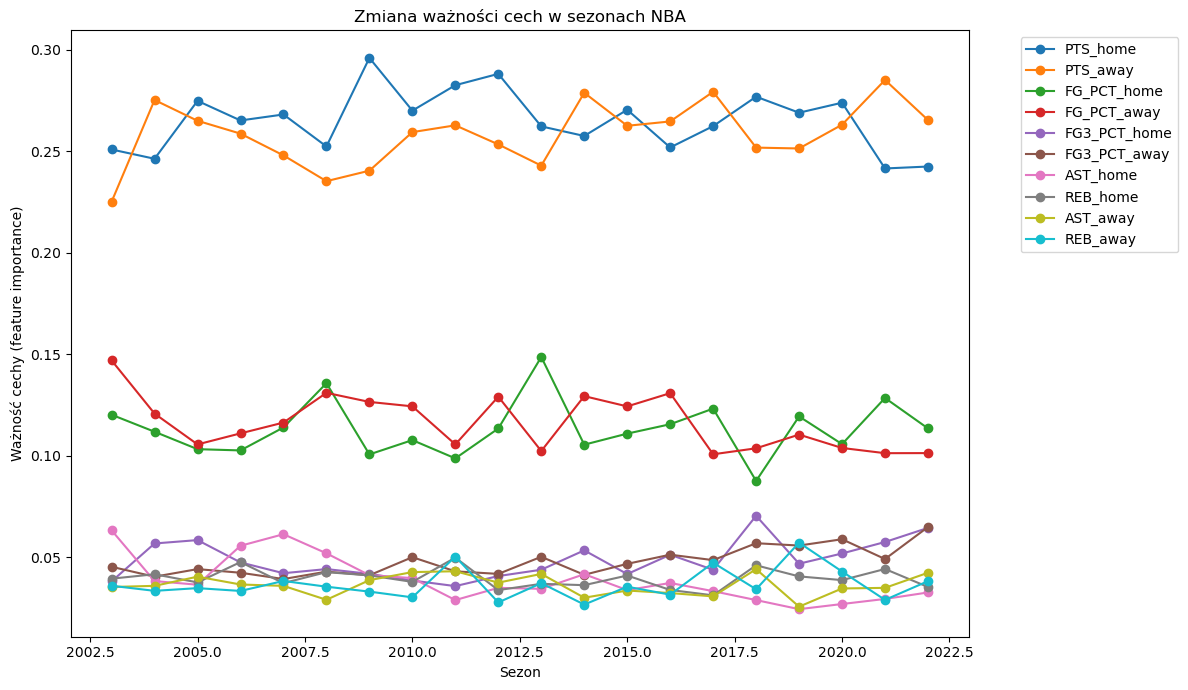

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(r"C:\Users\damis\OneDrive\Desktop\NBA_analysis\games.csv").dropna()

feature_cols = ['PTS_home', 'PTS_away', 'FG_PCT_home', 'FG_PCT_away', 'FG3_PCT_home', 'FG3_PCT_away', 'AST_home', 'REB_home', 'AST_away', 'REB_away']
seasons = df['SEASON'].unique()
seasons.sort()

feature_importances_over_time = pd.DataFrame()

for season in seasons:
    season_data = df[df['SEASON'] == season]
    X = season_data[feature_cols]
    y = season_data['HOME_TEAM_WINS']
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    
    fi = pd.Series(model.feature_importances_, index=feature_cols, name=season)
    feature_importances_over_time = pd.concat([feature_importances_over_time, fi], axis=1)

feature_importances_over_time = feature_importances_over_time.T

plt.figure(figsize=(12, 7))
for col in feature_cols:
    plt.plot(feature_importances_over_time.index, feature_importances_over_time[col], marker='o', label=col)

plt.title("Zmiana ważności cech w sezonach NBA")
plt.xlabel("Sezon")
plt.ylabel("Ważność cechy (feature importance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

